# Решение нелинейного уравнения

Начальное приближение: -2, найденный корень: -0.37141775245948644, f(корень) = 2.753075545314232e-13
Начальное приближение: 0, найденный корень: -0.37141775245938186, f(корень) = 1.8318679906315083e-13
Начальное приближение: 2, найденный корень: 0.6052671213146185, f(корень) = -5.551115123125783e-17
Начальное приближение: 4, найденный корень: 4.7079379181288585, f(корень) = 7.105427357601002e-15
Начальное приближение: 6, найденный корень: 4.707937918128979, f(корень) = -1.531219595563016e-12


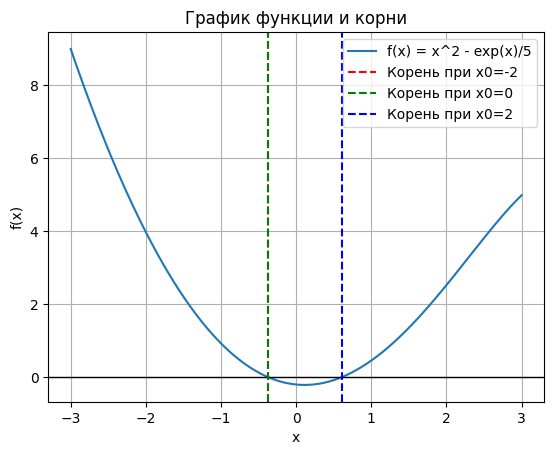

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции и ее производной
def f(x):
    return x**2 - np.exp(x)/5

def df(x):
    return 2*x - np.exp(x)/5

# Метод Ньютона
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Пример различных начальных приближений
x0_values = [-2, 0, 2, 4, 6]
roots = [newton_method(f, df, x0) for x0 in x0_values]

# Вывод результатов
for i, x0 in enumerate(x0_values):
    print(f"Начальное приближение: {x0}, найденный корень: {roots[i]}, f(корень) = {f(roots[i])}")

# Построение МПИ (метода пропорционального интервала) для разных корней
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 - exp(x)/5')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(roots[0], color='r', linestyle='--', label=f'Корень при x0={x0_values[0]}')
plt.axvline(roots[1], color='g', linestyle='--', label=f'Корень при x0={x0_values[1]}')
plt.axvline(roots[2], color='b', linestyle='--', label=f'Корень при x0={x0_values[2]}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('График функции и корни')
plt.grid(True)
plt.show()


In [9]:
import numpy as np

# Определение системы нелинейных уравнений
def system_eqs(vars):
    x, y = vars
    eq1 = np.cos(x - 1) + y - 0.5  # Уравнение 1
    eq2 = x - np.cos(y) - 3        # Уравнение 2
    return np.array([eq1, eq2])

# Частные производные для вычисления Якобиана
def jacobian(vars):
    x, y = vars
    df1_dx = -np.sin(x - 1)   # Частная производная по x для eq1
    df1_dy = 1                # Частная производная по y для eq1
    df2_dx = 1                # Частная производная по x для eq2
    df2_dy = np.sin(y)        # Частная производная по y для eq2
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

# Метод Ньютона для системы нелинейных уравнений
def newton_method_system(system_eqs, jacobian, initial_guess, tol=1e-6, max_iter=100):
    vars = np.array(initial_guess)
    
    for i in range(max_iter):
        f_val = system_eqs(vars)  # Значения системы уравнений
        jacobian_matrix = jacobian(vars)  # Якобиан
        delta = np.linalg.solve(jacobian_matrix, -f_val)  # Решение системы для дельта
        
        vars = vars + delta  # Обновление переменных
        
        # Проверка сходимости
        if np.linalg.norm(delta) < tol:
            return vars
    
    raise ValueError("Метод Ньютона не сошелся за максимальное количество итераций")

# Начальные приближения
initial_guesses = [(0, 0), (2, 1), (-1, -1)]

# Решение системы для разных начальных приближений
solutions = [newton_method_system(system_eqs, jacobian, guess) for guess in initial_guesses]

# Вывод результатов
for i, guess in enumerate(initial_guesses):
    x_sol, y_sol = solutions[i]
    print(f"Начальное приближение: {guess}, найденное решение: x = {x_sol}, y = {y_sol}")
    # Подставляем в уравнение 1 и уравнение 2 для проверки точности
    print(f"Подставляем в уравнение 1: {np.cos(x_sol - 1) + y_sol}, Подставляем в уравнение 2: {x_sol - np.cos(y_sol)}\n")


Начальное приближение: (0, 0), найденное решение: x = 3.3559117388279, y = 1.2069068175160185
Подставляем в уравнение 1: 0.5, Подставляем в уравнение 2: 3.0

Начальное приближение: (2, 1), найденное решение: x = 3.3559117388278996, y = 1.2069068175160214
Подставляем в уравнение 1: 0.5000000000000032, Подставляем в уравнение 2: 3.000000000000002

Начальное приближение: (-1, -1), найденное решение: x = 3.3559117388279, y = 1.2069068175160185
Подставляем в уравнение 1: 0.5, Подставляем в уравнение 2: 3.0

